### Preparation 

In [10]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

### Prepare Dataset

In [3]:
# Generate data
x = torch.randn(100, 2)
y = torch.where(x[:, 0] > x[:, 1], 1, -1).float()

print(x, y)

tensor([[-1.4445e-01,  7.6812e-01],
        [ 4.7634e-01, -1.5294e+00],
        [ 3.1961e-01, -1.0918e+00],
        [ 6.2431e-01,  1.5614e-01],
        [ 1.5620e-01, -4.0551e-01],
        [-2.0986e+00, -4.3148e-01],
        [ 1.5610e+00, -7.3793e-01],
        [-1.6214e+00,  2.2027e+00],
        [-9.6090e-02, -1.9671e-01],
        [ 7.9599e-01,  4.7100e-01],
        [ 2.5441e-01, -3.5316e-01],
        [-5.1934e-01, -5.0921e-01],
        [-1.5028e+00, -2.0196e+00],
        [ 1.0999e+00, -5.1096e-03],
        [ 1.7277e-01, -2.6019e-01],
        [-1.3485e-01, -8.9340e-01],
        [-6.2629e-01,  1.2175e+00],
        [-1.2940e+00, -2.6189e-01],
        [ 2.3448e-01, -1.2252e+00],
        [-7.1792e-01, -1.0861e+00],
        [ 7.8995e-01,  5.4910e-01],
        [ 4.2012e-01,  6.9809e-01],
        [ 2.2963e-01, -3.3476e+00],
        [ 8.7505e-01, -2.9304e-02],
        [-1.0082e+00,  4.1522e-01],
        [-6.5109e-01,  2.1176e+00],
        [ 1.3798e-01,  1.9219e-01],
        [-1.9596e+00,  4.166

In [5]:
# Set dataset and Dataloader
dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=10)
print(dataset, loader)

<torch.utils.data.dataset.TensorDataset object at 0x000001DFA4DD3C40> <torch.utils.data.dataloader.DataLoader object at 0x000001DFA4D20490>


### Define Models

In [6]:
# Define a model
class SVM(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        
    def forward (self, x):
        return self.linear(x)

### Define Loss Function and Optimizer

In [7]:
# Set models
model = SVM()

# Set Loss Function
criterion = nn.HingeEmbeddingLoss()

# Set optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.01)

### Fit Models

In [9]:
# Fit a model
for epoch in range(50):
    for inputs, targets in loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/50], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 0.2648
Epoch [20/50], Loss: -0.1136
Epoch [30/50], Loss: -0.4007
Epoch [40/50], Loss: -0.6781
Epoch [50/50], Loss: -0.9548


### Visualization

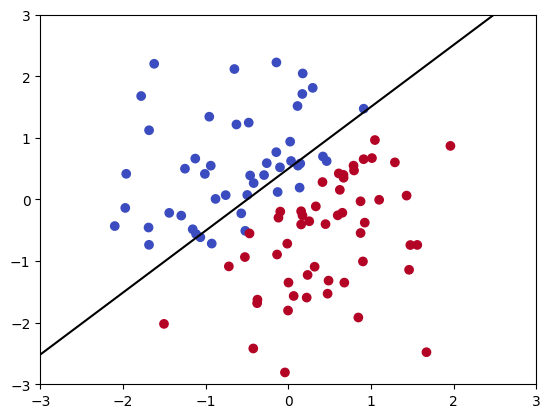

In [12]:
w = list(model.parameters())[0][0]
b = list(model.parameters())[1].item()
slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach().numpy()
x_range = np.linspace(-3, 3, 100)
y_range = slope * x_range + intercept

 

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()